In [1]:
import numpy as np
from numpy import linalg as LA
from numpy import array

import math  
from matplotlib import pyplot as plt
import pandas as pd

from scipy.linalg import svd

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

In [ ]:
# improvements

# EXERCICE 5
# split cat and num columns, create 2 pipelines (one for cat and one for num), 
# using a preprocessor like in this article 
# https://medium.com/@oluwabukunmige/implementing-linear-regression-with-sci-kit-learn-b6f87edc3150

# VIF Factor above 10 indicates multicollinearity. cyclinders has highesht VIF factor.
# Ridge regression (+ CV?)
# Lasso regression
# https://medium.com/analytics-vidhya/multiple-linear-regression-7727a012ff93
# https://medium.com/@powusu381/multiple-regression-in-python-using-scikit-learn-predicting-the-miles-per-gallon-mpg-of-cars-4c8e512234be

Exercice 1

In [ ]:
X = random.normal(loc=0, scale=5, size=(2,2))

Exercice 2

3) Choose three non-Gaussian probability distributions, with mean 0 and variance 2, and
write a function that that takes as input n, p and the distribution name, and creates a
matrix X P R nˆp with entries generated (i.i.d.) according to this distribution.

The 3 non-Gaussian proba distribution with mean 0 and var 2 we choose are <br>
A uniform distribution over [-sqrt(6), sqrt(6)] (with sqrt(6) ~ 2.45) <br>
A Laplace distribution with mean mu=0 and b=1 <br>
A Logistic distribution with mean mu=0 and s=sqrt(6)/pi

In [ ]:
def generator(n, p, distribution):
    if distribution == "uniform":
        return np.random.uniform(-math.sqrt(6), math.sqrt(6), (n, p))
    elif distribution == "laplace":
        return np.random.laplace(0, 1, (n, p))
    elif distribution == "logistic":
        return np.random.logistic(0, math.sqrt(6)/math.pi, (n,p))
    else:
        return "Choose distribution in 'uniform', 'laplace', or 'logistic'"

4) Display on one single graph the singular values of X for n “ 1000, and p “
200, 500, 1000, 2000 for the three distributions chosen

In [ ]:
# Générer X1, X2, X3, X4 avec n = 1000 et p = 200, 500, 1000, 2000
# REFACTOR, E.G WITH A FOR LOOP?
X1 = generator(1000, 200, "uniform")
X2 = generator(1000, 500, "uniform")
X3 = generator(1000, 1000, "uniform")
X4 = generator(1000, 2000, "uniform")
# Obtenir S1, S2, S3, S4 la matrice SVD comportant les singular values de X1, X2, X3, X4
# REFACTOR, E.G WITH A FOR LOOP?
S1 = np.linalg.svd(X1, compute_uv = False)
S2 = np.linalg.svd(X2, compute_uv = False)
S3 = np.linalg.svd(X3, compute_uv = False)
S4 = np.linalg.svd(X4, compute_uv = False)
# Plot 
# REFACTOR, E.G WITH A FOR LOOP?
plt.plot(S1, label = "p=200")
plt.plot(S2, label = "p=500")
plt.plot(S3, label = "p=1000")
plt.plot(S4, label = "p=2000")
plt.xlabel('Singular value index')
plt.ylabel('Singular value value')
plt.title('Singular values of X Mn,p uniform')
plt.legend()
# Rajouter titre, nom des axes, nom des lines (créer DF?)

In [ ]:
# Générer X1, X2, X3, X4 avec n = 1000 et p = 200, 500, 1000, 2000
# REFACTOR, E.G WITH A FOR LOOP?
Y1 = generator(1000, 200, "laplace")
Y2 = generator(1000, 500, "laplace")
Y3 = generator(1000, 1000, "laplace")
Y4 = generator(1000, 2000, "laplace")
# Obtenir S1, S2, S3, S4 la matrice SVD comportant les singular values de X1, X2, X3, X4
# REFACTOR, E.G WITH A FOR LOOP?
S1 = np.linalg.svd(Y1, compute_uv = False)
S2 = np.linalg.svd(Y2, compute_uv = False)
S3 = np.linalg.svd(Y3, compute_uv = False)
S4 = np.linalg.svd(Y4, compute_uv = False)
# Plot 
# REFACTOR, E.G WITH A FOR LOOP?
plt.plot(S1, label = "p=200")
plt.plot(S2, label = "p=500")
plt.plot(S3, label = "p=1000")
plt.plot(S4, label = "p=2000")
plt.xlabel('Singular value index')
plt.ylabel('Singular value value')
plt.title('Singular values of X Mn,p Laplace')
plt.legend()
# Rajouter titre, nom des axes, nom des lines (créer DF?)

In [ ]:
# Générer X1, X2, X3, X4 avec n = 1000 et p = 200, 500, 1000, 2000
# REFACTOR, E.G WITH A FOR LOOP?
Z1 = generator(1000, 200, "logistic")
Z2 = generator(1000, 500, "logistic")
Z3 = generator(1000, 1000, "logistic")
Z4 = generator(1000, 2000, "logistic")
# Obtenir S1, S2, S3, S4 la matrice SVD comportant les singular values de X1, X2, X3, X4
# REFACTOR, E.G WITH A FOR LOOP?
S1 = np.linalg.svd(Z1, compute_uv = False)
S2 = np.linalg.svd(Z2, compute_uv = False)
S3 = np.linalg.svd(Z3, compute_uv = False)
S4 = np.linalg.svd(Z4, compute_uv = False)
# Plot 
# REFACTOR, E.G WITH A FOR LOOP?
plt.plot(S1, label = "p=200")
plt.plot(S2, label = "p=500")
plt.plot(S3, label = "p=1000")
plt.plot(S4, label = "p=2000")
plt.xlabel('Singular value index')
plt.ylabel('Singular value value')
plt.title('Singular values of X Mn,p logistic')
plt.legend()
# Rajouter titre, nom des axes, nom des lines (créer DF?)

5) Display on one single graph the spectrum (i.e. the set of eigen values) of XJX{n for
n “ 1000, and p “ 200, 500, 1000, 2000. Comment.

In [ ]:
# Calculate X1_prime, X2_prime, X3_prime, X4_prime
n = 1000
X1_prime = X1.T @ X1 / n
X2_prime = X2.T @ X2 / n
X3_prime = X3.T @ X3 / n
X4_prime = X4.T @ X4 / n
# Get the vectors of eigen values (sorted in desc order) W1, W2, W3, W4
W1 = LA.eig(X1_prime)[0]
W1[::-1].sort()
W2 = LA.eig(X2_prime)[0]
W2[::-1].sort()
W3 = LA.eig(X3_prime)[0]
W3[::-1].sort()
W4 = LA.eig(X4_prime)[0]
W4[::-1].sort()
# Plot
plt.plot(W1, label = "p=200")
plt.plot(W2, label = "p=500")
plt.plot(W3, label = "p=1000")
plt.plot(W4, label = "p=2000")
plt.title("Eigenvalues of X.T@X/n for different number of columns")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue value")
plt.xlim(0, 1000)
plt.legend()

In [ ]:
# Calculate X1_prime, X2_prime, X3_prime, X4_prime
n = 1000
Y1_prime = Y1.T @ Y1 / n
Y2_prime = Y2.T @ Y2 / n
Y3_prime = Y3.T @ Y3 / n
Y4_prime = Y4.T @ Y4 / n
# Get the vectors of eigen values (sorted in desc order) W1, W2, W3, W4
W1 = LA.eig(Y1_prime)[0]
W1[::-1].sort()
W2 = LA.eig(Y2_prime)[0]
W2[::-1].sort()
W3 = LA.eig(Y3_prime)[0]
W3[::-1].sort()
W4 = LA.eig(Y4_prime)[0]
W4[::-1].sort()
# Plot
plt.plot(W1, label = "p=200")
plt.plot(W2, label = "p=500")
plt.plot(W3, label = "p=1000")
plt.plot(W4, label = "p=2000")
plt.title("Eigenvalues of X.T@X/n for different number of columns")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue value")
plt.xlim(0, 1000)
plt.legend()

In [ ]:
# Calculate X1_prime, X2_prime, X3_prime, X4_prime
n = 1000
Z1_prime = Z1.T @ Z1 / n
Z2_prime = Z2.T @ Z2 / n
Z3_prime = Z3.T @ Z3 / n
Z4_prime = Z4.T @ Z4 / n
# Get the vectors of eigen values (sorted in desc order) W1, W2, W3, W4
W1 = LA.eig(Z1_prime)[0]
W1[::-1].sort()
W2 = LA.eig(Z2_prime)[0]
W2[::-1].sort()
W3 = LA.eig(Z3_prime)[0]
W3[::-1].sort()
W4 = LA.eig(Z4_prime)[0]
W4[::-1].sort()
# Plot
plt.plot(W1, label = "p=200")
plt.plot(W2, label = "p=500")
plt.plot(W3, label = "p=1000")
plt.plot(W4, label = "p=2000")
plt.title("Eigenvalues of X.T@X/n for different number of columns")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue value")
plt.xlim(0, 1000)
plt.legend()

X matrix of Mn,p is distributed with a uniform probability and has mean 0 and var 2
Y matrix of Mn,p is distributed with a Laplace probability and has mean 0 and var 2
Z matrix of Mn,p is distributed with a logistic probability and has mean 0 and var 2
We fix n=1000 and increase p (from 200, 500, 1000 and 2000).
On the first graph, we plot the singular values of X, Y, Z, for several values of p (ie the sqrts of the eigen values of XTX, YTY, ZTZ)
For all 3 distributions, we get the same plot.
The # of non negative singular values = the # of columns.
The values of those singluar values have greater amplitude as p increases
The singular values are "linear"

On the second graph, we plot the eigenvalues of XTX/n, YTY/n, ZTZ/N, ie 1/n * the eigevalues of XTX etc
We get the same plot for all 3 distributions
The eigenvalues are "quadratic"?

Exercice 3

6)

In [ ]:
# Scaler au cas n, p diff et >2

In [ ]:
def power_method(X, n, u, v):
    for j in range(0, n):
        u = X @ v 
        v = X.T @ u
        v = v/LA.norm(v)
        u = u/LA.norm(u)
    return (u,v)

In [ ]:
import numpy as np
from numpy import random

n = 100
p = 2000
n_iter = 250

X = np.random.normal(loc=0, scale=5, size=(n, p)) # Mn,p
# X = np.array([[ 0.27572328, -7.87982259, -2.72355202],
    #   [-7.21876073, -9.8340995 , -0.32823418]]) 
u = np.random.rand(n, 1) # Mn,1
# u = np.array([[0.234234, 0.342980]]).T # Mn,1
v = np.random.rand(p, 1) # Mp,1
# v = np.array([[0.9841, 0.5891, 0.3492]]).T # Mp,1
power_method(X, n_iter, u, v)

In [ ]:
#Is it true that the output u, v from the algorithm converge to the singular vector associated to the largest
#singular value of X (check by computing these with numpy built in functions)

U, s, VT = svd(X)
print(U) # Left singular vectors as columns
print(s) # Diagonal matrix containing the singular values of X, ordered from largest to smallest
print(VT.transpose()) # Matrix containing the right singular vectors  AS ROWS (so we transpose it)
# (associated to the sing values..), ordered 
# from the sing vect associated to the largest sing value etc

the columns of the matrix V are the eigenvectors of the matrix AT A
The columns of the matrix U are thus the eigenvectors of the matrix A AT
The columns of U and the columns of V are called the left-singular vectors and the right-singular vectors of A, respectively.

In [ ]:
# convergence de u
# on crée un array qui contient u pr 10 itérations
def iter_u(X, n, u, v):
    iter_u = []
    for j in range(0, n):
        u = X @ v 
        v = X.T @ u
        v = v/LA.norm(v)
        u = u/LA.norm(u)
        iter_u.append(u)
    return(iter_u)
iter_u = iter_u(X, n_iter, u, v)
iter_u = np.absolute(iter_u) # Delete this extra line
print(iter_u)

# on crée un array limit_u qui contient 10 fois la limite 
limit_u = U[:,0].reshape(n, 1)
limit_u = np.full(shape=(n_iter, n, 1), fill_value=limit_u)
limit_u = np.absolute(limit_u)
print(limit_u)

# on soustrait la val abs de u à la val abs du singular vector (et prend sa L2 norm)
conv_u = iter_u - limit_u
print(conv_u)
norm_conv_u = LA.norm(conv_u, axis=1)
print(norm_conv_u)
# on plot cet array
plt.plot(norm_conv_u)
plt.title("Convergence of u to the left-singular vector of X")
plt.xlabel("Number of iterations of the power algorithm")
plt.ylabel("L2-Norm of u - u_limit")

In [ ]:
# convergence de v
# on crée un array qui contient u pr 10 itérations
def iter_v(X, n, u, v):
    iter_v = []
    for j in range(0, n):
        u = X @ v 
        v = X.T @ u
        v = v/LA.norm(v)
        u = u/LA.norm(u)
        iter_v.append(v)
    return(iter_v)
iter_v = iter_v(X, n_iter, u, v)
iter_v = np.absolute(iter_v) # Delete this extra line
print(iter_v)
# on crée un array limit_v qui contient 10 fois la limite 
limit_v = VT.transpose()[:,0].reshape(p,1)
limit_v = np.full(shape=(n_iter, p,1), fill_value=limit_v)
limit_v = np.absolute(limit_v)
print(limit_v)
# on soustrait la val abs de u à la val abs du singular vector (et prend sa L2 norm)
conv_v = iter_v - limit_v
print(conv_v)
norm_conv_v = LA.norm(conv_v, axis=1)
print(norm_conv_v)
# on plot cet array
plt.plot(norm_conv_v)
plt.title("Convergence of v to the right-singular vector of X")
plt.xlabel("Number of iterations of the power algorithm")
plt.ylabel("L2-Norm of v - v_limit")

8) Provide two sets of initialization vectors leading to different limits for this algorithm ;
explain how they are related.

In [ ]:
# We choose an initialization vector u that is orthogonal to the left singular vector?

9) Provide a way to approximate the largest singular value of X using the power method.

In [ ]:
# X une matrice déf avec loi norm
# La power method permet d'obtenir les left et right singular vectors de la plus grande singular val de X
# Let ui and vi be left-singular vector and the right-singular vector associated with σi then, Avi=σiui and ATui=σivi.

In [ ]:
def power_method(X, n, u, v):
    for j in range(0, n):
        u = X @ v 
        v = X.T @ u
        v = v/LA.norm(v)
        u = u/LA.norm(u)
    return (u,v)

In [ ]:
import numpy as np
from numpy import random

n = 100
p = 2000
n_iter = 300 # LE NOMBRE D'ITÉRATIONS EST TRES IMPORTANT
# PR OBTENIR UNE BONNE APPROXIMIATION DE LA PLUS GRANDE SINGULAR VALUE

X = np.random.normal(loc=0, scale=5, size=(n, p)) # Mn,p
u = np.random.rand(n, 1) # Mn,1
v = np.random.rand(p, 1) # Mp,1
u, v = power_method(X, n_iter, u, v)
print(u, v) # left and right singular vectors ui and vi of the largest eigen value

In [ ]:
sigma = (X @ v) / u
print(sigma[0])

In [ ]:
sigma = (X.T @ u) / v
print(sigma[0])

In [ ]:
#Is it true that the output u, v from the algorithm converge to the singular vector associated to the largest
#singular value of X (check by computing these with numpy built in functions)

U, s, VT = svd(X)
print(U) # Left singular vectors as columns
print(s) # Diagonal matrix containing the singular values of X, ordered from largest to smallest
print(VT.transpose()) # Matrix containing the right singular vectors  AS ROWS (so we transpose it)
# (associated to the sing values..), ordered 
# from the sing vect associated to the largest sing value etc

In [ ]:
np.isclose(sigma[0], s[0]) # we approximate the largest singular value

NB. On note que le nombre d'itérations n_iter doit être suffisamment élevé pour obtenir une approximation correcte
Pour ce faire, on détermine n_iter en utilisant les représentations graphiques obtenu à la question 7
Pour améliorer cet algorithme on chercherait à déterminer n automatiquement

10) Bonus : build upon the power method to provide an algorithm that can approximate the
second largest singular value of X (without using an SVD function)

In [ ]:
# refactorer pr n'avoir qu'une fonction qui donne iter_u iter_v
# Ne pas prendre la valeur abs?
# Créer fonctions intermediaires
# plot les 2 sur même graphe
# find the optimal number of iterations (algo)
# can you show it mathematically
# https://www.cs.yale.edu/homes/el327/datamining2013aFiles/07_singular_value_decomposition.pdf
# https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf
# file:///Users/louisfialho/Downloads/[18440835%20-%20Analele%20Universitatii%20_Ovidius_%20Constanta%20-%20Seria%20Matematica]%20Block%20Power%20Method%20for%20SVD%20Decomposition%20(1).pdf

Exercice 4. (PCA)

11) Import with Pandas the dataset defra_consumption.csv

In [2]:
df = pd.read_csv('http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv', sep=';')
df

,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.columns

In [3]:
df.rename({'Unnamed: 0': 'Category'}, axis=1, inplace=True)
df

,Category,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


12) Center and standardize the dataset using the preprocessing module from sklearn, where
we write X P Rnˆp for the associated matrix (n “ 17 is the number of observations, and p “ 4 is the number of variables)

In [4]:
num_cols = [c for c in df.columns
                     if df[c].dtype.kind in ["i", "f"]]
num_cols

['England', 'Wales', 'Scotland', 'N Ireland']

In [5]:
df[num_cols] = preprocessing.scale(df[num_cols]) 
df

,Category,England,Wales,Scotland,N Ireland
0,Cheese,-0.830281,-0.890961,-0.784142,-0.781715
1,Carcass meat,-0.511509,-0.615412,-0.479033,-0.349984
2,Other meat,0.490347,0.664561,0.636042,0.335201
3,Fish,-0.734650,-0.764297,-0.742436,-0.723721
4,Fats and oils,-0.629910,-0.597634,-0.606344,-0.474563
5,Sugars,-0.714157,-0.730965,-0.687560,-0.624917
6,Fresh potatoes,0.570040,0.822335,0.232157,1.295320
7,Fresh Veg,-0.493293,-0.530969,-0.634880,-0.616326
8,Other Veg,0.041789,0.146794,-0.092708,-0.160967
9,Processed potatoes,-0.618525,-0.668744,-0.527323,-0.521817


In [6]:
X = df.iloc[:,1:].to_numpy()
print(X, X.shape)

[[-0.83028135 -0.89096138 -0.78414166 -0.78171514]
 [-0.51150903 -0.6154117  -0.47903269 -0.34998399]
 [ 0.49034683  0.66456098  0.63604179  0.33520127]
 [-0.73464965 -0.76429741 -0.74243611 -0.7237214 ]
 [-0.62991018 -0.5976343  -0.60634435 -0.47456313]
 [-0.71415715 -0.73096479 -0.6875604  -0.62491726]
 [ 0.57003991  0.82233539  0.23215655  1.2953198 ]
 [-0.49329347 -0.53096906 -0.63487972 -0.61632559]
 [ 0.04178864  0.14679425 -0.09270767 -0.16096736]
 [-0.61852545 -0.6687439  -0.52732332 -0.52181728]
 [-0.24966034 -0.30875158 -0.27050498 -0.2060736 ]
 [ 1.43983296  1.40676736  1.09041269  0.52421789]
 [ 2.28230266  2.39563515  2.19890209  2.28550915]
 [-0.93957472 -0.95762662 -0.89389308 -0.82252554]
 [ 2.05916204  1.67120616  2.44035523  2.31128414]
 [-0.21550616 -0.06431235 -0.00490653 -0.63350892]
 [-0.94640555 -0.97762619 -0.87413783 -0.83541304]] (17, 4)


13) Display a scatter plot of the n points projected on the space generated by the first two
principal axes (corresponding to largest eigenvalues).

Visualizing 2 or 3 dimensional data is not that challenging. 
However, our dataset is 4 dimensional. 
We will use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that we can plot and hopefully understand the data better.

In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.643874,-0.038130
1,-0.979237,-0.159582
2,1.064553,0.219175
3,-1.482615,-0.008756
4,-1.155279,-0.107406
5,-1.379405,-0.064789
6,1.454407,-0.629215
7,-1.136946,0.070026
8,-0.031022,0.180591
9,-1.168855,-0.069682


In [16]:
finalDf = pd.concat([principalDf, df[['Category']]], axis = 1)

In [17]:
finalDf

,principal component 1,principal component 2,Category
0,-1.643874,-0.038130,Cheese
1,-0.979237,-0.159582,Carcass meat
2,1.064553,0.219175,Other meat
3,-1.482615,-0.008756,Fish
4,-1.155279,-0.107406,Fats and oils
5,-1.379405,-0.064789,Sugars
6,1.454407,-0.629215,Fresh potatoes
7,-1.136946,0.070026,Fresh Veg
8,-0.031022,0.180591,Other Veg
9,-1.168855,-0.069682,Processed potatoes


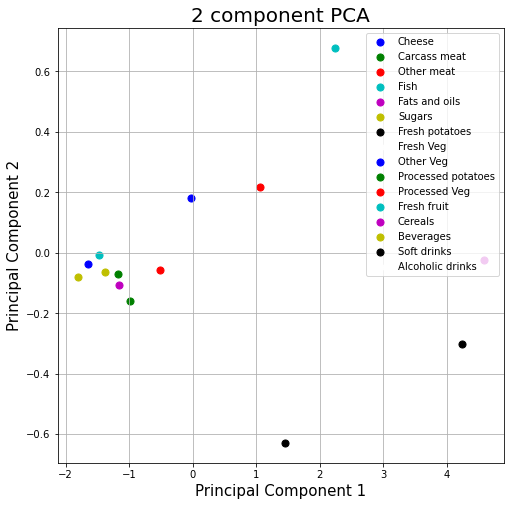

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this

In [19]:
pca.explained_variance_ratio_

array([0.9707222 , 0.01930926])

The first component contains much more information that the second one
Together, they contain 99% of the information
Did we run the PCA on the right axis?

In [20]:
print(pca.components_)

[[ 0.50526231  0.50123046  0.50094821  0.49247225]
 [ 0.27858192  0.34368879  0.22784545 -0.86738491]]


14) Repeat the previous question for the space generated by three axes.

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

In [ ]:
pca.explained_variance_ratio_

The 3rd dimension is useless, but let's plot it

In [ ]:
finalDf = pd.concat([principalDf, df[['Category']]], axis = 1)

In [ ]:
finalDf

15) Compare the previous 2D and 3D graphs with the one obtained as follows :

(a) Compute XJX, and diagonalize it. Project the n points encoded by X over the span
of the eigen vectors associated to the two (respectively three) largest eigen values.

In [7]:
M = X.T @ X
M

array([[17.        , 16.84112428, 16.74359627, 16.10953096],
       [16.84112428, 17.        , 16.39006584, 15.93003321],
       [16.74359627, 16.39006584, 17.        , 15.9926114 ],
       [16.10953096, 15.93003321, 15.9926114 , 17.        ]])

In [8]:
w, v = LA.eig(M)
print(w)
print(v)

[66.00910989  0.06668829  1.3130295   0.61117233]
[[ 0.50526231  0.814348   -0.27858192 -0.06276508]
 [ 0.50123046 -0.4774699  -0.34368879 -0.63456169]
 [ 0.50094821 -0.32963209 -0.22784545  0.76712452]
 [ 0.49247225 -0.01423082  0.86738491 -0.07008552]]


We call v1, v2, v3 the eigenvectors associated to the 3 largest eigenvalues, respectively

In [12]:
v1 = v[:,0]
v2 = v[:,2]
v3 = v[:,3]
print(v1, v2, v3)

[0.50526231 0.50123046 0.50094821 0.49247225] [-0.27858192 -0.34368879 -0.22784545  0.86738491] [-0.06276508 -0.63456169  0.76712452 -0.07008552]


We project each of the 17 4 dimensional vectors onto the subspace generated by v1 and v2

Exercice 5. (Analysis of the auto-mpg dataset)
Here, we consider the auto-mpg.data. We aim at predicting cars consumption based on
several characteristics : cylinders, displacement, horsepower, weight, acceleration, year, country
and cars name. The output coding cars consumption (more precisely the “mpg”, i.e.,the distance
ridden in miles for a gallon of oil) is written y ;

In [ ]:
# réagencer le df pr mettre les continous var, puis discrete, puis target var au bout

In [ ]:
df = pd.read_csv('auto-mpg.data-original', header=None, delim_whitespace=True,
            names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                   'acceleration', 'model year', 'origin', 'car name'])
df

In [ ]:
df.dtypes

Since all columns of interest have dtype float64, we can confidently say that there is no exotic string encoding for NaNs. <br>
NaNs could therefore be exotically encoded with floats (e.g. 999.99), so we use df.describe to spot "outliers", but cannot see any irrational values (e.g. negative values) <br>
Therefore, we should identify NaNs with the traditional df.isna() <br>

In [ ]:
df.describe()

In [ ]:
 df.isna().sum()

In [ ]:
# If you open the file in a text pad on your computer, you will find some records with ? value for horsepower feature

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
df.dropna(inplace=True)

In [ ]:
 df.isna().sum()

In [ ]:
df.drop('car name', axis=1, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)
df

17) Add two or three binary features to meaningfully encode the three origins ('origin' feature, for which, initially, 1 stands for USA, 2 for Europe and 3 for Japan) 3
.

Two methods are possible. 1) pd.get_dummies 2) Scikit Learn OneHotEncoder

In [ ]:
# Before employing either method, we add the info
df['origin'].replace([1,2,3],['USA','Europe', 'Japan'],inplace=True)
df

In [ ]:
# 1st solution using pd.get_dummies
df = pd.concat([df,pd.get_dummies(df['origin'],prefix='country')]
               ,axis=1).drop(['origin'],axis=1)
# drop_first=True to drop one dim
df

In [ ]:
# 2nd solution using Sklearn OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['origin']]).toarray())
enc_df.columns = enc.get_feature_names(['origin'])
df = df.join(enc_df)
df.drop('origin', axis=1, inplace=True)
df
# Can we put all of that into a pipeline?

NB. We tried to add the OneHotEncoding to the pipeline (to use it in the last question), but we cannot easily rename the columns and drop the original "origin" column

18) Select (manually) 9 rows of the dataset such that all 3 origins are represented, and model
year is not constant. Get the least-squares estimator θˆ (with intercept) the prediction vector
yˆ, considering only these 9 lines. What do you observe ? Why ?

Should we add part of the pipeline here?

In [ ]:
df2 = df.drop_duplicates('model year').sample(9).reset_index(drop=True)
df2

In [ ]:
# Multiple linear regression with Scikit learn
X = df2.drop('mpg',axis=1)
y = df2.mpg

reg = LinearRegression().fit(X, y)

theta_hat = reg.coef_
intercept = reg.intercept_
y_hat = X @ theta_hat + intercept 
y_hat

print(theta_hat, intercept, y_hat, reg.score(X,y))



Each time we change the sample, we see that the weights are different - we even
sometimes get illogical weights (e.g. a positive weight for the "weight" feature, which 
means that the heavier the car, the higher the mpg, (and the less the car "consumes" fuel)) <br>
We can see that the r2 score is 1 (y_hat = y), wich might show that we are "overfitting"
the training set <br>
Therefore, we cannot safely extrapolate those weights to new
data because our training set is too small <br>

19) Now, get the least-squares estimator θˆ and the prediction vector yˆ (with intercept) over the
whole dataset, after performing scaling/centering (the columns must have unit standard
deviation and be zero mean). Which variables seem to best explain gasoline consumption
according to your model ? Why wouldn’t this answer make sense if the columns were not
normalized ?

In [ ]:
df

In [ ]:
X = df.drop('mpg',axis=1).values
y = df.mpg  
print(X, y)

In [ ]:
pipeline = Pipeline(steps=[('scaler', StandardScaler(copy=False)), ('regression', LinearRegression())])
pipeline.fit(X, y)
reg = pipeline.named_steps['regression']
theta_hat = reg.coef_
intercept = reg.intercept_
print(theta_hat, intercept)

In [ ]:
X

We get r2 = 0.82, i.e. 82% of the var of the mpg can be explained by our weights.
Weight is the most important feature. If the columns were not normalized, this would
not make sense because the scale of weight is much higher than the other features
and we would suspect the influence of weight to be overestimated.
Here, having scaled the features, we can confidently say that weight is an
important features, intependently of the range of values it takes

In [ ]:
y_hat = X @ theta_hat + intercept 
y_hat

20)

In [ ]:
r = y - y_hat
r_sq_norm = LA.norm(r)**2
r_sq_norm

In [ ]:
yn_bar = np.mean(y)
yn_bar_vect = yn_bar * np.ones(len(y))
yn_bar_vect

In [ ]:
one = LA.norm(y - yn_bar_vect)**2
two = r_sq_norm + LA.norm(y_hat - yn_bar_vect)**2
print(one, two)
np.isclose(one, two)

21)

In [ ]:
X_test = pd.DataFrame(np.array([[6, 225, 100, 3233, 15.4, 117, 0, 0, 1]]), 
                      columns=['cylinders', 'displacement', 'horsepower', 'weight',
                   'acceleration', 'model year', 'country_Europe', 'country_Japan', 'country_USA'])
X_test

In [ ]:
pipeline.predict(X_test)

In [ ]:
# Double checking the result
y_hat = X_test.values @ theta_hat + intercept
y_hat

In [ ]:
df.describe()

53.1 MPG seems very high, indeed higher than the maximum (46.6), which means that the consumption is very low. <br>
In our original model, the model year have a weight of 2.86, which is the highest weight, which means that the more recent the car, the higher the mpg (and the less it consumes fuel) <br>
Here, we get a very high mpg because we are extrapolating the weights with model year 117, which is much bigger than what we had in our training data. <br>
It would be interesting to make further analysis to understand if this linear relation is still true 35 years after the training data (it could have been exponential due to hybrid cars for instance?)